# Sentiment Analysis of YT series  MONEY HEIST  Trailer Comments Using Naïve Bayes



### INTRODUCTION

Netflix has produced many TV series, one of which is Money Heist. This series has five seasons with a total of 41 episodes. The fourth season was released on April 3, 2020,which has eight episodes. The fourth season of Money Heist is  31.73  times  more  demand  than  the  average  series  around  the  world. However, despite the many requests for the fourth season of the Money Heist series,there are still some negative comments made by the connoisseurs of the Money Heist series. In the YouTube comments column on the Netflix channel,there are still many who comment neutral and provide positive comments on this series. Therefore, there needs to be a method in which viewers' comments or opinions can be analyzed in order to be able to classify the opinions they make about this series by conducting sentiment analysis using the Naïve Bayes algorithm.Based on the results of research conducted, Naive Bayes can be saidto be successful in conducting sentiment analysis because it achieves results of 64% , 54% and 57% for accuracy, precision,and recall, respectively

## Python Libraries


* Numpy
* pandas
* Matplotlib
* Sklearn
* nltk (Natural Language toolkit)
* re (Regular Expression)

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re


## Formation of dataset

In [2]:
url="https://raw.githubusercontent.com/Shahin-kaushar/YT-comment-sentiment-analysis/7f8acbf4fe153dc4456193106022dc32819794f0/comments%20Money%20Heist%20%20Series%20Trailer%20%20Netflix.csv"

df=pd.read_csv(url)


In [3]:
df.head()

,publishedTimeText,simpleText,votes,author,isReply,isHearted,isPinned,isPaid,paidAmount,isSponsor,sponsorshipMonths
0,2 years ago,"This show truly is a masterpiece, sad it’s com...",5217,@R2debo_,False,False,False,False,NaN,False,NaN
1,2 years ago,At least we have a spinoff coming in 2023 :),51,@cesarvaldez767,True,False,False,False,NaN,False,NaN
2,2 years ago,Squid game - am i joke to you,25,@dontcheckmychannel5882,True,False,False,False,NaN,False,NaN
3,2 years ago,Which is best money heist or squid game,16,@dontcheckmychannel5882,True,False,False,False,NaN,False,NaN
4,2 years ago,Exactly this is the best show on Netflix so we...,22,@bri5990,True,False,False,False,NaN,False,NaN


In [4]:
df.columns

Index(['publishedTimeText', 'simpleText', 'votes', 'author', 'isReply',
       'isHearted', 'isPinned', 'isPaid', 'paidAmount', 'isSponsor',
       'sponsorshipMonths'],
      dtype='object')

In [5]:
df.shape

(3092, 11)

In [6]:
df.isna().sum()

publishedTimeText       0
simpleText              0
votes                   0
author                  0
isReply                 0
isHearted               0
isPinned                0
isPaid                  0
paidAmount           3092
isSponsor               0
sponsorshipMonths    3092
dtype: int64

In [7]:
df1=df.drop(['publishedTimeText','votes','author', 'isReply','isHearted', 'isPinned', 'isPaid', 'paidAmount', 'isSponsor','sponsorshipMonths',],axis=1)

In [8]:
df1

,simpleText
0,"This show truly is a masterpiece, sad it’s com..."
1,At least we have a spinoff coming in 2023 :)
2,Squid game - am i joke to you
3,Which is best money heist or squid game
4,Exactly this is the best show on Netflix so we...
...,...
3087,Nairobi!
3088,Smart 🎉❤👍👍👍👍
3089,Who is like naroby
3090,How to denlond


In [9]:
df1.rename(columns={'simpleText':"Comment"},inplace=True)
df1

,Comment
0,"This show truly is a masterpiece, sad it’s com..."
1,At least we have a spinoff coming in 2023 :)
2,Squid game - am i joke to you
3,Which is best money heist or squid game
4,Exactly this is the best show on Netflix so we...
...,...
3087,Nairobi!
3088,Smart 🎉❤👍👍👍👍
3089,Who is like naroby
3090,How to denlond


## Sentiment Analysis

In  this  study, we   conducted  a  labeling  process  for  sentiment  analysis.  This labeling process is done manually by using 3 labels or using a sentiment word dictionary consisting of:
* 1.Positive Comment:  The word positive sentiment here is taken according to good-spoken comments and does not contain ridicule of the film.
* 2.Negative Comment : The word negative sentiment according to comments that are offensive or contain satirical words about this film.
* 3.Neutral Comment:  A word neutral sentiment that is not offensive or discussed outside of this film.

### The break up of the  sentiment classes are as::


*   Negative: It depicts the negative sentiment and its value ranges from 0 to 1.

* Neutral: It depicts the neutral sentiment and its value ranges from 0 to 1.

* Positive: It depicts the positive sentiment and its value ranges from 0 to 1.

* Compound: It provides us the overall sentiment score and its value ranges from -1 to 1, -1 being the strong negative sentiment and 1 being the strong positive sentiment.





In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["Comment"]]
df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["Comment"]]
df1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1["Comment"]]
df1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df1["Comment"]]
score = df1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df1["Sentiment"] = sentiment
df1.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Comment,Positive,Negative,Neutral,Compound,Sentiment
0,"This show truly is a masterpiece, sad it’s com...",0.387,0.171,0.442,0.5994,Positive
1,At least we have a spinoff coming in 2023 :),0.273,0.000,0.727,0.4588,Positive
2,Squid game - am i joke to you,0.306,0.000,0.694,0.2960,Positive
3,Which is best money heist or squid game,0.375,0.000,0.625,0.6369,Positive
4,Exactly this is the best show on Netflix so we...,0.455,0.000,0.545,0.8189,Positive


In [11]:
df1["Sentiment"].value_counts()

Sentiment
Neutral     1469
Positive    1188
Negative     435
Name: count, dtype: int64

In [12]:
positive=df1.loc[df1["Sentiment"]=="Positive"].count()[0]
negative=df1.loc[df1["Sentiment"]=="Negative"].count()[0]
neutral=df1.loc[df1["Sentiment"]=="Neutral"].count()[0]


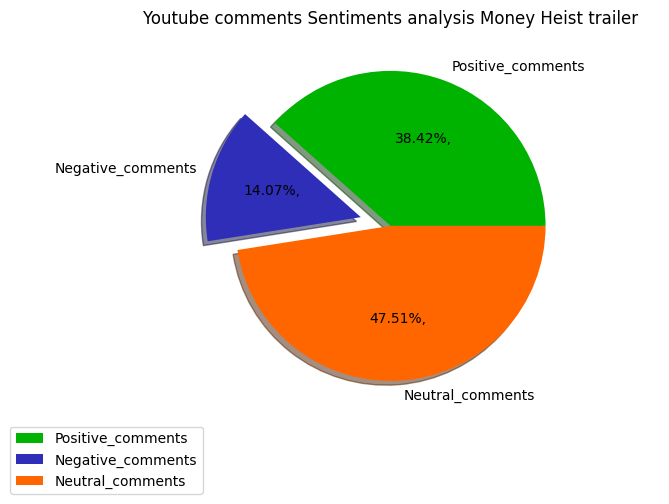

In [13]:
plt.figure(figsize=(5,6))
plt.title("    Youtube comments Sentiments analysis Money Heist trailer    ",)

labels=["Positive_comments","Negative_comments","Neutral_comments"]
exp=[0,0.2,0]
color=["#00b300","#2e2eb8","#ff6600"]
plt.pie([positive,negative,neutral],colors=color,labels=labels,explode=exp,autopct="%1.2f%%,",pctdistance=0.6,shadow=True,labeldistance=1.1)
plt.legend(loc="upper left", bbox_to_anchor=(-0.5,0))
plt.show()

## Preprocessing



The following is an explanation of the pre-processes above:
* 1. Case FoldingNot all text documents are consistent in the use of capital letters. Therefore, the role of Case Folding is  needed  in  converting  the  entire  text  in  a  document  into  a  standard  form  (usually  lowercase  or lowercase). Case Folding is changing all the letters in a document into lowercase letters. Only the letters 'a' to 'z' are accepted. Characters other than letters are omitted and are considered a delimiter.
* 2. TokenizingThe  tokenizing  stage  is  the  stage  of  cutting  the  input string  based  on each  word that makes it  up. Tokenisasi outline breaks a group of characters in a text into word units, how to distinguish certain characters that can be treated as word separators or not.
* 3. StemmingThe  stemming  technique  is  needed  in  addition  to  reducing  the  number  of  different  indexes  of  a document, also to do a grouping of other words that have similar basic words and meanings but have different forms or forms because they get different affixes. The stemming process in Indonesian texts is different from stemming in English texts. In English texts, the only process required is the process of removing suffixes. While in the Indonesian-language text all affixes both suffixes and prefixes are also omitted.
* 4. FilteringThe filtering stage is the stage of taking important words from the token results. Can use the Stoplist algorithm (discarding less important words) or Wordlist (save important words). Stoplist / Stopword are non-descriptive words that can be discarded in a bag-of-words approach


In [14]:
nltk.download('stopwords')

stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def text_processing(text):
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)

    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)

    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)

    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text


In [16]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

data_copy = df1.copy()

data_copy.Comment = data_copy.Comment.apply(lambda text: text_processing(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])


## processed dataset

In [18]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()


,Sentence,Sentiment
0,show truly masterpiece sad coming end,2
1,least spinoff coming 2023,2
2,squid game joke,2
3,best money heist squid game,2
4,exactly best show netflix well executed,2


In [19]:
processed_data['Sentiment'].value_counts()

Sentiment
1    1469
2    1188
0     435
Name: count, dtype: int64

In [20]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

## Model Evaluation

After  the  preprocessing  phase, feature  extraction  uses  TF-IDF,  the  next  phase  is an implementation using Naive Bayesand its performance is measured using a confusion matrix.The dataset is then divided into two, with a portion of 80% for training models and the remaining 20% for testing models. In the testing phase of the model, the Naïve Bayes algorithm is measured using a confusion matrix.

Confusion MatrixThe confusion matrix obtained from the evaluation metrics, namely the scoreof accuracy, precision, and recall.

𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=(𝑇𝑃+𝑇𝑁)(𝑇𝑃+𝐹𝑃+𝐹𝑁+𝑇𝑁)

𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=(𝑇𝑃)/(𝑇𝑃+𝐹𝑃)

𝑅𝑒𝑐𝑎𝑙𝑙=(𝑇𝑃)/(𝑇𝑃+𝐹𝑁)


In [21]:
df_neutral = processed_data[(processed_data['Sentiment']==1)]
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative,
                                 replace=True,
                                 n_samples= 205,
                                 random_state=42)

df_neutral_upsampled = resample(df_neutral,
                                 replace=True,
                                 n_samples= 205,
                                 random_state=42)


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [22]:
final_data['Sentiment'].value_counts()

Sentiment
2    1188
0     205
1     205
Name: count, dtype: int64

In [23]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['still room new season one season could professor prework heist prior first season example unanswered question could answered professor track tokio also rest member professor know alison parker gon na visit place exactly day professor plan first face face meeting raquel cafe also planned raquels phone battery would run professor know detail police plan professor get money supply heist lot weapon big mansion trained etc',
 'wokeliberalism infected series originally 2 season yeawas disappointing ending',
 'war',
 'miss tokyo',
 'dipanshusingh740 wtf']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 31,   4,  24],
       [ 10,  28,  18],
       [ 97,  19, 249]])

## Result

In [27]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy : ',nb_score)

accuracy :  0.6416666666666667


In [28]:
precision = precision_score(y_test, y_pred,average="macro")
print("precision : ",precision)

precision :  0.543109130698447


In [29]:
recall = recall_score(y_test, y_pred,average="macro")
print("recal: ",recall)

recal:  0.5692051698784923


##CONCLUSION

Sentiment analysis is a computational-based method of analysis of opinions, sentiments,and emotions.  Sentiment  analysis  is  used  to  see  the  tendency  of  a  sentiment,  whether  the  opinion  is positive, neutral, or negative. In this study sentiment analysis of the Money Heist  series trailer on YouTube. From the results of sentiment analysis, it is found that comments tend to be many positive ones so it can be concluded that the film is in demand by the audience. Based onthe results of research conducted, Naive Bayes can be said to be successful in conducting sentiment analysis